# Tax Returns Filling
Looking at how individuals choose to file based on income bracket \
Work on by Evan Sellers & Michael Yager

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv("./data/tax_data_2020.csv")
df = df[df.zipcode != 0]

## Filling Status of Returns

Seems to be 3 main types of returns in this dataset

    Single Returns (mars1) - filing status is single

    Joint Returns (MARS2) - filing status is married and they file together

    Head of Household Returns (MARS4) - filing status is head of household

(Are we potentially missing the MARS3 column?)

From my research it looks like there are two other filing statuses:

    Qualififed Widow - People who lost a spouse recently and are supporting a child at home.

    Married, filing seperately 

This could also help explain why there was some issue in recreating the number of returns for each row.

### Most popular overall tax return 

In [3]:
total_number_single_returns = df.mars1.sum()
total_number_joint_returns = df.MARS2.sum()
total_number_hoh_returns = df.MARS4.sum()

total_number_returns = df.N1.sum()

In [4]:
print('% of total returns filed as single reutrns: ', round(total_number_single_returns/total_number_returns*100,2))
print('% of total returns filed as joint reutrns: ', round(total_number_joint_returns/total_number_returns*100,2))
print('% of total returns filed as HoH reutrns: ', round(total_number_hoh_returns/total_number_returns*100,2))

% of total returns filed as single reutrns:  50.23
% of total returns filed as joint reutrns:  34.21
% of total returns filed as HoH reutrns:  13.25


Most returns are either single or joint returns.

In [5]:
100 - 50.23 - 34.21 - 13.25

2.3100000000000023

Should be noted that 2.31% of all returns are unaccounted for, this probably comes from the two types of returns that we do not have the numbers for in the dataset. However, since they are so unpopular it will not effect the analysis a lot. (Spent some time researching to try and confirm this but could not find anything concrete)

It also could come from rounding error as well as return numbers are rounded to the nearest ten. 

### Most popular tax return type by income bracket

In [6]:
gp = df.groupby(['agi_stub'])[['N1','mars1','MARS2','MARS4']].sum()
gp

,N1,mars1,MARS2,MARS4
agi_stub,,,,
1,50434370.0,36980120.0,5467110.0,7101710.0
2,38987940.0,21931840.0,7791560.0,8209600.0
3,22584830.0,10590660.0,8163470.0,3116780.0
4,14269770.0,4586050.0,8045370.0,1259560.0
5,22379400.0,4157030.0,16769580.0,1046930.0
6,9270090.0,1079900.0,7783240.0,182820.0


In [7]:
gp['percent_single'] = round(gp.mars1/gp.N1*100,2)
gp['percent_joint'] = round(gp.MARS2/gp.N1*100,2)
gp['percent_hoh'] = round(gp.MARS4/gp.N1*100,2)
gp['percent_unaccounted'] = 100-gp.percent_single-gp.percent_joint-gp.percent_hoh
gp['brackets'] = [1,2,3,4,5,6]
gp

,N1,mars1,MARS2,MARS4,percent_single,percent_joint,percent_hoh,percent_unaccounted,brackets
agi_stub,,,,,,,,,
1,50434370.0,36980120.0,5467110.0,7101710.0,73.32,10.84,14.08,1.76,1
2,38987940.0,21931840.0,7791560.0,8209600.0,56.25,19.98,21.06,2.71,2
3,22584830.0,10590660.0,8163470.0,3116780.0,46.89,36.15,13.80,3.16,3
4,14269770.0,4586050.0,8045370.0,1259560.0,32.14,56.38,8.83,2.65,4
5,22379400.0,4157030.0,16769580.0,1046930.0,18.58,74.93,4.68,1.81,5
6,9270090.0,1079900.0,7783240.0,182820.0,11.65,83.96,1.97,2.42,6


Text(0.5, 1.0, 'Tax Return type percentage by bracket')

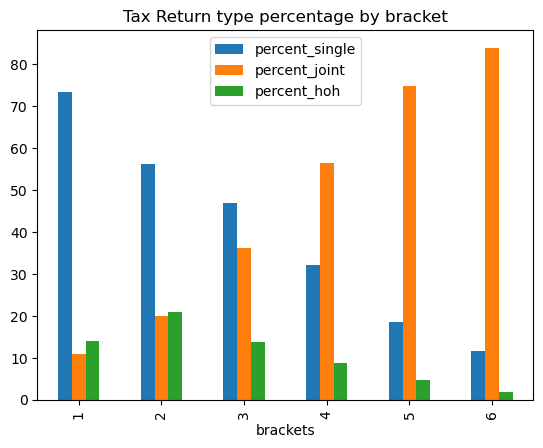

In [8]:
gp.plot.bar(x='brackets', y=['percent_single','percent_joint','percent_hoh'])
plt.title('Tax Return type percentage by bracket')

This makes a lot of sense that the joint percentage goes up as the income increases since you have two people contributing to the income. Same logic applies for the single percentage going down as income increases, because it gets rarer and rarer to find a single person making that much money. 

### Most Popular Tax Return by $ overall

Not exactly sure how you want to go about doing this because return types are grouped together within the row and there is no way to tell how much money each type of return contributed to the overall income amount in the row 

### Most popular tax return by $ amount by tax bracket

Same comment as above

### Most popular tax return by state

In [9]:
gp2 = df.groupby(['STATE'])[['N1','mars1','MARS2','MARS4']].sum()

In [10]:
gp2['percent_single'] = round(gp2.mars1/gp2.N1*100,2)
gp2['percent_joint'] = round(gp2.MARS2/gp2.N1*100,2)
gp2['percent_hoh'] = round(gp2.MARS4/gp2.N1*100,2)
gp2['percent_unaccounted'] = 100-gp2.percent_single-gp2.percent_joint-gp2.percent_hoh
gp2

,N1,mars1,MARS2,MARS4,percent_single,percent_joint,percent_hoh,percent_unaccounted
STATE,,,,,,,,
AK,350020.0,182460.0,121990.0,36750.0,52.13,34.85,10.50,2.52
AL,2162740.0,983610.0,750500.0,380570.0,45.48,34.70,17.60,2.22
AR,1295320.0,580220.0,483370.0,202770.0,44.79,37.32,15.65,2.24
AZ,3323210.0,1658110.0,1139810.0,473720.0,49.89,34.30,14.25,1.56
CA,18882640.0,9891980.0,6217180.0,2447770.0,52.39,32.93,12.96,1.72
CO,2851670.0,1494830.0,1021620.0,274940.0,52.42,35.83,9.64,2.11
CT,1806830.0,936480.0,605690.0,221890.0,51.83,33.52,12.28,2.37
DC,341400.0,224170.0,57110.0,49290.0,65.66,16.73,14.44,3.17
DE,497120.0,246610.0,168230.0,69060.0,49.61,33.84,13.89,2.66


Numbers seem to be roughly the same across states, which should be expected